# Homework 2

In [7]:
import numpy as np
from numpy import linalg as la

### Question 1

#### a)

In [13]:
X = np.matrix([[1,0,1,0,1], 
              [0,1,0,1,1],
              [0,0,0,0,0],
              [0,0,1,1,1]])
print(X)

[[1 0 1 0 1]
 [0 1 0 1 1]
 [0 0 0 0 0]
 [0 0 1 1 1]]


In [14]:
la.matrix_rank(X)

3

Matrix X has a rank of three because: first of all, X has more rows than columns and it has 4 columns, so the maximum rank for a matrix of this size is 4. However, matrix X's 3rd row is only zeros, which makes it a linear combination of any of the other rows (when multiplied with 0, all other rows gives us row 3). Any of the other three rows cannot be written as linear combinations of other rows so the matrix has rank 3. 

#### b)

In [15]:
print(X @ X.T)

[[3 1 0 2]
 [1 3 0 2]
 [0 0 0 0]
 [2 2 0 3]]


In [16]:
la.matrix_rank(X @ X.T)

3

XX^T is a 4-by-4 matrix with rank 3. It has one row and one column full of zeros, and the rest of the three columns and rows are linearly independent (cannot be written as linear combinations of other rows or columns).

#### c)

Only column 5 is linearly dependent to other columns. (e.g. it can be written as (column-2 * 1 + column-3 * 1). Therefore the largest set of linearly independent columns of X contains columns 1 to 4 (inclusive).  

### Question 2

#### a)

Yes. We cannot multiply either column to obtain the other column. Since some rows contain values with different signs and others contain the same value with the same sign, they cannot be linearly dependent.  

#### b)

Yes. We cannot solve Xz = 0 with a non-zero z. No linear combination of any column or columns give another column in the matrix. 

#### c)

No. (Row-1 + Row-3) / 2 = Row-2

#### d)

Rank of the matrix X is 2. It has two columns that are linearly independent.

### Question 3

#### a)

Rank of X is 3. No column can be linearly dependent when they have zeros at different rows. 

#### b)

$ \boldsymbol{y} \boldsymbol{X}^{-1} = \boldsymbol{w} $

where $ \boldsymbol{X}^{-1} $ is 

In [45]:
X = np.matrix([[1,1,1], [1,1,0], [1,0,0]])
print(la.inv(X))

[[ 0.  0.  1.]
 [-0.  1. -1.]
 [ 1. -1. -0.]]


### Question 4

#### a)

In [48]:
def solve(X, y):
    w = la.inv(X) @ y
    return(w)

In [53]:
X = np.matrix([[25,0,1], [20,1,2], [40,1,6]])
y = np.array([110,110,210])
solution = solve(X, y)

In [55]:
print(solution)

[[ 4.25 17.5   3.75]]


#### b)

<img src="q4b.jpeg" />

In [58]:
w = np.array([4, 9, 4])

In [60]:
X = np.matrix([[25, 2/3, 1], [20, 22/9, 2], [40, 26/9, 6]])

In [63]:
X @ w

matrix([[110., 110., 210.]])

#### c)

In [66]:
X = np.matrix([[25,15,10,0,1], 
             [20,12,8,1,2],
             [40,30,10,1,6], 
             [30,15,15,0,3],
             [35,20,15,2,4]])
X

matrix([[25, 15, 10,  0,  1],
        [20, 12,  8,  1,  2],
        [40, 30, 10,  1,  6],
        [30, 15, 15,  0,  3],
        [35, 20, 15,  2,  4]])

In [67]:
la.matrix_rank(X)

4

In [68]:
y = np.array([104,97,193,132,174])

In [70]:
solve(X, y)

LinAlgError: Singular matrix

In [73]:
print(la.det(X))

0.0


We cannot solve this system because the matrix X has a determinant of 0 (i.e. it is a singular matrix), thus, it is not invertible. 

### Question 5

<img src="q5new.jpg" />

### Question 6

In [8]:
import scipy.io as sio
import numpy as np
# #### Part a #####
# load the training data X and the training labels y
matlab_data_file = sio.loadmat ('face_emotion_data.mat')
X = matlab_data_file['X']
y = matlab_data_file['y']
# n = number of data points
# p = number of features
n, p = np.shape(X)
# Solve the least - squares solution . w is the list of weight coefficients

In [9]:
X.shape

(128, 9)

In [10]:
y.shape

(128, 1)

#### a)

In [11]:
w = la.inv(X.T @ X) @ X.T @ y

In [12]:
print(w)

[[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]


#### b)

Since we have the prediction of weights for each feature, we would simply get the product of these weiqhts with the new values for our 9 features. And set the label to +1 (happy) if the product is above 0, and -1 if it is below 0 (mad). 

#### c)

Looking at the weight vector, we can assume that the features with larger absolute weights are the most important features as they have the biggest impact on our prediction. Therefore, 1st feature seems to be the most important, followed by the 4th, 3rd, and the 2nd features. 

#### d)

Yes we can design a classifier with just the 1st, 4th, and 3rd features. We would drop the other columns in our feature matrix and calculate the new weight factor of size 3. 

#### e) & f)

In [13]:
def get_cv_error(X, y, k=8):
    k = 8

    errors = np.zeros(8)
    for i in range(k):
        batches_X = np.split(X, k)
        batches_Y = np.split(y, k)
        testX = batches_X.pop(i)
        testY = batches_Y.pop(i)
        trainX = np.concatenate(batches_X)
        trainY = np.concatenate(batches_Y)
        w = la.inv(trainX.T @ trainX) @ trainX.T @ trainY
        preds = np.sign(testX @ w)
        error_rate = sum(preds != testY) / len(testY)
        errors[i] = error_rate
    return(errors.mean())

With all 9 features: 

In [17]:
y.shape

(128, 1)

In [14]:
get_cv_error(X, y)

0.046875

With just 3 features:

In [15]:
get_cv_error(X[:, [0, 3, 2]], y)

0.078125

The error rate slightly increases when we drop 6 columns, but the model still performs well. 

### Question 7

#### a)

In [220]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
# load x and y vectors
d = sio.loadmat('polydata.mat')
x = d ['x']
y = d ['y']
# n = number of data points
# N = number of points to use for interpolation
# z = points where interpolant is evaluated
# p = array to store the values of the interpolated polynomials
n = x.size
N = 100
z = np.linspace(np.min(x), np.max(x), N)
p = np.zeros((3, N))

Text(0, 0.5, 'y')

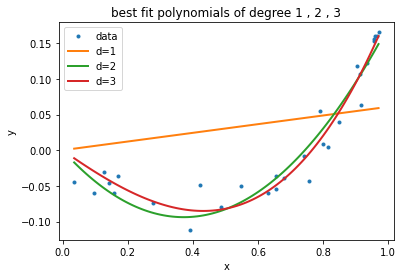

In [225]:
for d in [1, 2, 3]:
    cols = [x]
    zs = [z]
    for i in range(2, d + 1):
        col = x ** i
        cols.append(col)
        polz = z ** i
        zs.append(polz)
    newx = np.concatenate(cols, axis=1)
    newz = np.matrix(zs).T   
    w = la.inv(newx.T @ newx) @ newx.T @ y
    result = newz @ w
    p[d - 1, :] = result.T
plt.plot(x, y, '.', z, p[0, :], z, p[1, :], z, p[2, :], linewidth=2)
plt.legend (['data', 'd=1', 'd=2', 'd=3'] , loc='upper left')
plt.title ('best fit polynomials of degree 1 , 2 , 3')
plt.xlabel ('x')
plt.ylabel ('y')